Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.  
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

1. Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено:
   - 500 минут разговора
   - 50 сообщений
   - 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей
   
2. Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено:
   - 3000 минут разговора
   - 1000 сообщений
   - 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей

Значения минут и мегабайтов всегда округляются вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

Описание данных

Таблица ___users___ (информация о пользователях):
- *user_id* — уникальный идентификатор пользователя
- *first_name* — имя пользователя
- *last_name* — фамилия пользователя
- *age* — возраст пользователя (годы)
- *reg_date* — дата подключения тарифа (день, месяц, год)
- *churn_date* — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- *city* — город проживания пользователя
- *tariff* — название тарифного плана

Таблица ___calls___ (информация о звонках):
- *id* — уникальный номер звонка
- *call_date* — дата звонка
- *duration* — длительность звонка в минутах
- *user_id* — идентификатор пользователя, сделавшего звонок

Таблица ___messages___ (информация о сообщениях):
- *id* — уникальный номер сообщения
- *message_date* — дата сообщения
- *user_id* — идентификатор пользователя, отправившего сообщение

Таблица ___internet___ (информация об интернет-сессиях):
- *id* — уникальный номер сессии
- *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
- *session_date* — дата интернет-сессии
- *user_id* — идентификатор пользователя

Таблица ___tariffs___ (информация о тарифах):
- *tariff_name* — название тарифа
- *rub_monthly_fee* — ежемесячная абонентская плата в рублях
- *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
- *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
- *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
- *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

План действий

1. Изучение общей информации о данных


2. Подготовка данных
 - Приведение данных к нужным типам
 - Поиск и исправление ошибок в данных
 - Подсчет для каждого пользователя:
    - количества сделанных звонков и израсходованных минут разговора по месяцам
    - количества отправленных сообщений по месяцам
    - объем израсходованного интернет-трафика по месяцам
    - помесячную выручку с каждого пользователя


3. Анализ данных
 - Описание поведения клиентов оператора, исходя из выборки (количество минут разговора, сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц) 
 - Подсчет среднего количества, дисперсии и стандартного отклонения
 - Построение гистограммы
 - Распределения


4. Проверка гипотез:
 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов


5. Общий вывод

## Изучение общей информации о данных

In [1]:
import pandas as pd
pd.options.display.float_format ='{:,.3f}'.format
import matplotlib.pyplot as plt
import math as m
import numpy as np
import seaborn as sns
sns.set()

import scipy.stats
import warnings
warnings.simplefilter('ignore')

In [2]:
calls = pd.read_csv('https://code.s3.yandex.net/datasets/calls.csv')
internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet.csv')
messages = pd.read_csv('https://code.s3.yandex.net/datasets/messages.csv')
tariffs = pd.read_csv('https://code.s3.yandex.net/datasets/tariffs.csv')
users = pd.read_csv('https://code.s3.yandex.net/datasets/users.csv')

Просматриваем информациб из calls:

In [3]:
calls.info()
calls.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.000,1000
1,1000_1,2018-08-17,0.000,1000
2,1000_2,2018-06-11,2.850,1000
3,1000_3,2018-09-21,13.800,1000
4,1000_4,2018-12-15,5.180,1000
5,1000_5,2018-11-02,0.000,1000
6,1000_6,2018-10-18,0.000,1000
7,1000_7,2018-08-22,18.310,1000
8,1000_8,2018-09-15,18.440,1000
9,1000_9,2018-08-15,0.000,1000


In [4]:
calls['duration'].max()

38.0

Проверим нулевые и близкие к нулю значения столбца calls. Для этого возьмем отрезок от 0 секунд до 0.1 минуты (6 секунд). 
Возможно это не ошибки, а недозвон и сброшенные вызовы.

In [5]:
calls[(calls['duration'] < 0.1) & (calls['duration'] > 0)].head(15)

,id,call_date,duration,user_id
135,1000_135,2018-10-25,0.020,1000
334,1000_334,2018-12-03,0.090,1000
453,1001_85,2018-12-12,0.010,1001
624,1002_134,2018-12-07,0.030,1002
800,1003_93,2018-11-20,0.080,1003
1058,1003_351,2018-10-24,0.070,1003
1067,1003_360,2018-08-27,0.040,1003
1806,1005_403,2018-12-29,0.020,1005
1818,1005_415,2018-07-28,0.080,1005
1824,1005_421,2018-08-03,0.010,1005


Значения есть, причем их много - так что наша догадка (гипотеза) верна

Займемся датасетом internet

In [6]:
internet.info()
internet.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.950,2018-11-25,1000
1,1,1000_1,"1,052.810",2018-09-07,1000
2,2,1000_2,"1,197.260",2018-06-25,1000
3,3,1000_3,550.270,2018-08-22,1000
4,4,1000_4,302.560,2018-09-24,1000
5,5,1000_5,399.970,2018-10-02,1000
6,6,1000_6,540.080,2018-09-07,1000
7,7,1000_7,415.700,2018-07-11,1000
8,8,1000_8,505.400,2018-10-08,1000
9,9,1000_9,345.540,2018-09-03,1000


датасет с сообщениями messages:

In [7]:
messages.info()
messages.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Посмотрим что есть в тарифах:

In [8]:
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


И последний датасет users, наши клиенты

In [9]:
users.info()
users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [10]:
users['churn_date'].describe()

count             38
unique            33
top       2018-12-21
freq               2
Name: churn_date, dtype: object

В столбце churn_date есть пропуски, это не ошибка, значит что клиенты продолжают сидеть на этих тарифах.
Максимальное значение: 3 декабря 2018 года, для удобства заменим пропущенные значения на 31 декабря 2020.

In [11]:
users['churn_date'].fillna('2020-12-31', inplace=True)

**ПЕРВЫЕ ВЫВОДЫ:**
1. Звонки "calls" - пропусков нет, но есть вопросы:
- call_date - показывает дату звонка, необходим перевод в формат даты
- duration - дробные числа, но тариф подразумевает окруление в большую сторону, надо поменять на int
 
2. Инет-сессии "internet" - попусков нет, но проблемки:
- session_date - показывает дату сессии, необходим перевод в формат даты
- mb_used - дробные числа, но тариф подразумевает окруление в большую сторону, надо поменять на int
  
3. Сообщения "messages" - Пропусков нет.
- message_date - показывает дату сообщения, необходим перевод в формат даты

4. tariffs - Пропусков нет
  
5. users - пропуски в churn_date, но они объяснимы. 
- reg_date, churn_date показывает даты регистрация и обнуления регистрации, необходим перевод в формат даты.

## Подготовка данных

### Приведение данных к нужным типам

Чтобы не менять в ручную типы данных, округлять - создадим функцию которая все за нас сделает,
назовем ее change_type,
в ней будет указываться датасет в котором надо менять, название столбца, тип на который менять надо, а так же округление (с помощью библиотеки numpy и функции ceil, изначально была math, но чтото не пошло)

In [12]:
def change_type(data, column, new_type, ceil):
    if new_type == 'int':
        temp_type = data[column].dtype
        
        if ceil == 'yes':            
            data[column] = np.ceil(data[column])            
        else:
            data[column] = data[column]
        data[column] = data[column].astype(new_type)
        
    elif new_type == 'DT':
        temp_type = data[column].dtype
        data[column] = pd.to_datetime(data[column])

    else:
        print('Проблемки')

In [13]:
change_type(calls, 'duration', 'int', 'yes')
change_type(calls, 'call_date', 'DT', 'no')
#change_type(internet, 'mb_used', 'int', 'no')
change_type(internet, 'session_date', 'DT', 'no')
change_type(messages, 'message_date', 'DT', 'no')
change_type(users, 'reg_date', 'DT', 'no')
change_type(users, 'churn_date', 'DT', 'no')

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [16]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


#### Выводы

Просмотрели методом info(0) измененные данные, все получилось. 

### Поиск и исправление ошибок в данных

Предположим что в интернет сессия, если отображается в датасете состоялась, а значит хоть чтото, но передалось, но было настолько мало, что появился 0. По правилам тарифа округляется до 1, округлим до 1.

In [18]:
internet['mb_used'].replace(0, 1, inplace = True)

#### Вывод

Убрали некорректные значения, которые привели бы к ошибкам в итоге.

### Подсчет для каждого пользователя

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Создадим сводную таблицу с помощью функции. В ней будет отображаться количество звонков и минут по каждому клиенту.

In [19]:
def pivot_by_month(data, duration_column, date_column, data_name):

    if (data_name == 'calls') | (data_name == 'internet'):
        temp_pivot = data.pivot_table(index=[data[date_column].dt.month, 'user_id'],
                                                values=[duration_column, 'id'],
                                                aggfunc={'id': 'count',
                                                         duration_column: 'sum'})[[duration_column, 'id']]
        if data_name == 'calls':
            temp_pivot.columns = ['minutes_per_month', 'calls_per_month']
    
        elif data_name == 'internet':
            temp_pivot.columns = ['mb_per_month', 'sessions_per_month']
        
    elif data_name == 'messages':
        temp_pivot = data.pivot_table(index=[data[date_column].dt.month, 'user_id'],
                                                values='id',
                                                aggfunc='count')
        
        
        temp_pivot.columns = ['messages_per_month']
    
    temp_pivot.index.names = ['month', 'user_id']
    
    return temp_pivot

Звонки:

In [20]:
calls_by_month = pivot_by_month(calls, 'duration', 'call_date', 'calls')
calls_by_month

minutes_per_month  calls_per_month
month user_id                                    
1     1005                    95               15
      1032                   380               61
      1045                     9                1
      1055                   551               64
      1071                   194               24
...                          ...              ...
12    1494                   418               62
      1495                  1031              155
      1496                   518               80
      1497                   545               71
      1499                   492               69

[3174 rows x 2 columns]

Сообщения по месяцам:

In [21]:
messages_by_month = pivot_by_month(messages, 'XXX', 'message_date', 'messages')
messages_by_month

messages_per_month
month user_id                    
1     1005                      7
      1032                     38
      1045                      5
      1055                     30
      1071                     16
...                           ...
12    1493                     78
      1495                     84
      1496                     51
      1497                     17
      1499                     66

[2717 rows x 1 columns]

Интернет по месяцам:

In [22]:
internet_by_month = pivot_by_month(internet, 'mb_used', 'session_date', 'internet')
internet_by_month

mb_per_month  sessions_per_month
month user_id                                  
1     1005        2,727.970                   6
      1032       24,138.690                  62
      1045        2,346.710                   5
      1055       17,094.880                  47
      1071       15,607.340                  40
...                     ...                 ...
12    1494       17,626.210                  49
      1495       23,427.760                  47
      1496       20,749.150                  68
      1497       19,924.600                  47
      1499       13,060.580                  45

[3203 rows x 2 columns]

#### Помесячная выручка с каждого пользователя

Соединяем полученные данные:

In [23]:
messages_by_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1, 1005) to (12, 1499)
Data columns (total 1 columns):
messages_per_month    2717 non-null int64
dtypes: int64(1)
memory usage: 32.7 KB


In [24]:
messages_by_month.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1, 1005) to (12, 1499)
Data columns (total 1 columns):
messages_per_month    2717 non-null int64
dtypes: int64(1)
memory usage: 32.7 KB


In [25]:
internet_by_month.head()

mb_per_month  sessions_per_month
month user_id                                  
1     1005        2,727.970                   6
      1032       24,138.690                  62
      1045        2,346.710                   5
      1055       17,094.880                  47
      1071       15,607.340                  40

In [26]:
all_calls_messages_internet = (
    calls_by_month.join([messages_by_month, internet_by_month], 
                                     how='outer')
)

In [27]:
all_calls_messages_internet.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1, 1005) to (12, 1499)
Data columns (total 5 columns):
minutes_per_month     3174 non-null float64
calls_per_month       3174 non-null float64
messages_per_month    2717 non-null float64
mb_per_month          3203 non-null float64
sessions_per_month    3203 non-null float64
dtypes: float64(5)
memory usage: 139.1 KB


In [28]:
all_calls_messages_internet.head(15)

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                95.000           15.000               7.000   
      1032               380.000           61.000              38.000   
      1045                 9.000            1.000               5.000   
      1055               551.000           64.000              30.000   
      1071               194.000           24.000              16.000   
      1113               110.000           18.000              14.000   
      1120                55.000            5.000                 nan   
      1126               272.000           35.000               4.000   
      1134               332.000           42.000              32.000   
      1135                90.000            9.000               1.000   
      1155               337.000           44.000              48.000   
      1168               277.000           38.000              14.000   
      1176               187.000           25.000              20.000   
      1189                51.000            7.000               1.000   
      1193               388.000           53.000              24.000   

               mb_per_month  sessions_per_month  
month user_id                                    
1     1005        2,727.970               6.000  
      1032       24,138.690              62.000  
      1045        2,346.710               5.000  
      1055       17,094.880              47.000  
      1071       15,607.340              40.000  
      1113          767.220               2.000  
      1120          656.750               1.000  
      1126       16,364.030              30.000  
      1134       10,203.010              31.000  
      1135        1,601.280               4.000  
      1155       20,136.870              64.000  
      1168        8,156.070              20.000  
      1176        6,856.920              20.000  
      1189          540.360               3.000  
      1193        7,144.310              30.000

In [29]:
all_calls_messages_internet.fillna(0)

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                95.000           15.000               7.000   
      1032               380.000           61.000              38.000   
      1045                 9.000            1.000               5.000   
      1055               551.000           64.000              30.000   
      1071               194.000           24.000              16.000   
...                          ...              ...                 ...   
12    1494               418.000           62.000               0.000   
      1495             1,031.000          155.000              84.000   
      1496               518.000           80.000              51.000   
      1497               545.000           71.000              17.000   
      1499               492.000           69.000              66.000   

               mb_per_month  sessions_per_month  
month user_id                                    
1     1005        2,727.970               6.000  
      1032       24,138.690              62.000  
      1045        2,346.710               5.000  
      1055       17,094.880              47.000  
      1071       15,607.340              40.000  
...                     ...                 ...  
12    1494       17,626.210              49.000  
      1495       23,427.760              47.000  
      1496       20,749.150              68.000  
      1497       19,924.600              47.000  
      1499       13,060.580              45.000  

[3214 rows x 5 columns]

<div class="alert alert-info"> <b>Сравним цифры с исходными данными:</b></div>

In [30]:
print(internet['mb_used'].sum())
print(all_calls_messages_internet['mb_per_month'].sum())

55324865.73
55324865.73


In [31]:
print(calls['duration'].sum())
print(all_calls_messages_internet['minutes_per_month'].sum())

1450301
1450301.0


In [32]:
print(len(messages['id']))
print(all_calls_messages_internet['messages_per_month'].sum())

123036
123036.0


<div class="alert alert-info"> <b>Звонки, интернет и сообщения совпали, наверное все сделали верно</b></div>

Проверяем что у нас получилось:

In [33]:
all_calls_messages_internet.head(15)

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                95.000           15.000               7.000   
      1032               380.000           61.000              38.000   
      1045                 9.000            1.000               5.000   
      1055               551.000           64.000              30.000   
      1071               194.000           24.000              16.000   
      1113               110.000           18.000              14.000   
      1120                55.000            5.000                 nan   
      1126               272.000           35.000               4.000   
      1134               332.000           42.000              32.000   
      1135                90.000            9.000               1.000   
      1155               337.000           44.000              48.000   
      1168               277.000           38.000              14.000   
      1176               187.000           25.000              20.000   
      1189                51.000            7.000               1.000   
      1193               388.000           53.000              24.000   

               mb_per_month  sessions_per_month  
month user_id                                    
1     1005        2,727.970               6.000  
      1032       24,138.690              62.000  
      1045        2,346.710               5.000  
      1055       17,094.880              47.000  
      1071       15,607.340              40.000  
      1113          767.220               2.000  
      1120          656.750               1.000  
      1126       16,364.030              30.000  
      1134       10,203.010              31.000  
      1135        1,601.280               4.000  
      1155       20,136.870              64.000  
      1168        8,156.070              20.000  
      1176        6,856.920              20.000  
      1189          540.360               3.000  
      1193        7,144.310              30.000

Появившиеся NaN заменяем на 0, так как возможно кто-то не воспользовался той или иной услугой. 

In [34]:
all_calls_messages_internet.fillna(0, inplace=True)

Меняем типы данных нашей старой функцией:

In [35]:
all_calls_messages_internet['mb_per_month'].apply(lambda x: m.ceil(x))

month  user_id
1      1005        2728
       1032       24139
       1045        2347
       1055       17095
       1071       15608
                  ...  
12     1494       17627
       1495       23428
       1496       20750
       1497       19925
       1499       13061
Name: mb_per_month, Length: 3214, dtype: int64

In [36]:
all_calls_messages_internet['gb_per_month'] = all_calls_messages_internet['mb_per_month'] / 1024

In [37]:
for column_name in all_calls_messages_internet.columns:
    change_type(all_calls_messages_internet, column_name, 'int', 'no')

In [38]:
all_calls_messages_internet.head(15)

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   
      1113                   110               18                  14   
      1120                    55                5                   0   
      1126                   272               35                   4   
      1134                   332               42                  32   
      1135                    90                9                   1   
      1155                   337               44                  48   
      1168                   277               38                  14   
      1176                   187               25                  20   
      1189                    51                7                   1   
      1193                   388               53                  24   

               mb_per_month  sessions_per_month  gb_per_month  
month user_id                                                  
1     1005             2727                   6             2  
      1032            24138                  62            23  
      1045             2346                   5             2  
      1055            17094                  47            16  
      1071            15607                  40            15  
      1113              767                   2             0  
      1120              656                   1             0  
      1126            16364                  30            15  
      1134            10203                  31             9  
      1135             1601                   4             1  
      1155            20136                  64            19  
      1168             8156                  20             7  
      1176             6856                  20             6  
      1189              540                   3             0  
      1193             7144                  30             6

Подготавливаем таблицу со значениями тарифов к слиянию: назначаем индексом значение tariff_name. Переименовываем в tariff для соответствия конечному датафрейму

In [39]:
tariffs.set_index('tariff_name', inplace=True)
tariffs.index.name = 'tariff'

Соединяем датасет users с тарифами

In [40]:
users_and_tariffs = users.merge(tariffs, on='tariff')

users_and_tariffs.set_index('user_id', inplace=True)

Формируем конечную таблицу

In [41]:
all_calls_messages_internet = (
    all_calls_messages_internet.join(users_and_tariffs.loc[:, ['tariff', 'messages_included', 'mb_per_month_included', 
                                 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 
                                 'rub_per_message', 'rub_per_minute', 'city', 'reg_date',
                                                     'churn_date']], how='inner')
) 

In [42]:
all_calls_messages_internet

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   
...                          ...              ...                 ...   
12    1494                   418               62                   0   
      1495                  1031              155                  84   
      1496                   518               80                  51   
      1497                   545               71                  17   
      1499                   492               69                  66   

               mb_per_month  sessions_per_month  gb_per_month tariff  \
month user_id                                                          
1     1005             2727                   6             2  smart   
      1032            24138                  62            23  smart   
      1045             2346                   5             2  smart   
      1055            17094                  47            16  smart   
      1071            15607                  40            15  smart   
...                     ...                 ...           ...    ...   
12    1494            17626                  49            17  smart   
      1495            23427                  47            22  ultra   
      1496            20749                  68            20  smart   
      1497            19924                  47            19  smart   
      1499            13060                  45            12  smart   

               messages_included  mb_per_month_included  minutes_included  \
month user_id                                                               
1     1005                    50                  15360               500   
      1032                    50                  15360               500   
      1045                    50                  15360               500   
      1055                    50                  15360               500   
      1071                    50                  15360               500   
...                          ...                    ...               ...   
12    1494                    50                  15360               500   
      1495                  1000                  30720              3000   
      1496                    50                  15360               500   
      1497                    50                  15360               500   
      1499                    50                  15360               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
month user_id                                                                 
1     1005                 550         200                3               3   
      1032                 550         200                3               3   
      1045                 550         200                3               3   
      1055                 550         200                3               3   
      1071                 550         200                3               3   
...                        ...         ...              ...             ...   
12    1494                 550         200                3               3   
      1495                1950         150                1               1   
      1496                 550         200                3               3   
      1497                 550         200                3               3   
      1499                 550         200                3               3   

                           city   reg_date churn_date  
month user_id                             

Сдлаем еще одну функцию для вывода по показателей "value" (минуты, сообщения, трафик)
логика простая: если клиент уложился в лимит по показателю, то ничего не платит сверху, ксли лимит исчерпан - то в соответсвии тарифу доплачивает

In [43]:
def testing_for_limits(value):
    
    if value == 'minutes':                                                  
        all_calls_messages_internet['test_limit'] = (
            all_calls_messages_internet['minutes_per_month'] - 
            all_calls_messages_internet['minutes_included']
        )
        

        out_of_tariff = (all_calls_messages_internet['test_limit'] > 0)
                   
        all_calls_messages_internet.loc[out_of_tariff, 'amount_for_minutes'] = (
            all_calls_messages_internet[out_of_tariff]['test_limit'] *
            all_calls_messages_internet[out_of_tariff]['rub_per_minute']                
            )
        

        in_tariff = (all_calls_messages_internet['test_limit'] <= 0)
        
        all_calls_messages_internet.loc[in_tariff, 'amount_for_minutes'] = 0
    

    if value == 'message':                                               
        all_calls_messages_internet['test_limit'] = (
            all_calls_messages_internet['messages_per_month'] - 
            all_calls_messages_internet['messages_included']
        )
        

        out_of_tariff = (all_calls_messages_internet['test_limit'] > 0)
                   
        all_calls_messages_internet.loc[out_of_tariff, 'amount_for_messages'] = (
            all_calls_messages_internet[out_of_tariff]['test_limit'] *
            all_calls_messages_internet[out_of_tariff]['rub_per_message']                
            )
        

        in_tariff = (all_calls_messages_internet['test_limit'] <= 0)
        
        all_calls_messages_internet.loc[in_tariff, 'amount_for_messages'] = 0
    

    if value == 'internet':                                              
        all_calls_messages_internet['test_limit'] = (
            all_calls_messages_internet['mb_per_month'] - 
            all_calls_messages_internet['mb_per_month_included']
        )
        

        out_of_tariff = (all_calls_messages_internet['test_limit'] > 0)
        all_calls_messages_internet['test_limit'] = np.ceil(all_calls_messages_internet['test_limit']).astype(int)           
        all_calls_messages_internet.loc[out_of_tariff, 'amount_for_internet'] = (
            (all_calls_messages_internet[out_of_tariff]['test_limit'] / 1024) *
            all_calls_messages_internet[out_of_tariff]['rub_per_gb']                
            )
        
        in_tariff = (all_calls_messages_internet['test_limit'] <= 0)
        
        all_calls_messages_internet.loc[in_tariff, 'amount_for_internet'] = 0
        
    del all_calls_messages_internet['test_limit']

In [44]:
values = ['minutes', 'message', 'internet']

for name in values:
    testing_for_limits(name)

Считаем месячную выручу по показателям для каждого клиента, складываем доходы + абонентскую плату:

In [45]:
all_calls_messages_internet['total_income'] = (
    (all_calls_messages_internet['amount_for_minutes'] +
     all_calls_messages_internet['amount_for_messages'] +
     all_calls_messages_internet['amount_for_internet']) +
    all_calls_messages_internet['rub_monthly_fee']
).astype('int')

In [46]:
delete = ['messages_included', 'mb_per_month_included', 
                      'minutes_included', 'rub_monthly_fee', 
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute',
                 'amount_for_minutes', 'amount_for_messages', 'amount_for_internet']


for name in delete:
    del all_calls_messages_internet[name]

In [47]:
all_calls_messages_internet.head(15)

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   
      1113                   110               18                  14   
      1120                    55                5                   0   
      1126                   272               35                   4   
      1134                   332               42                  32   
      1135                    90                9                   1   
      1155                   337               44                  48   
      1168                   277               38                  14   
      1176                   187               25                  20   
      1189                    51                7                   1   
      1193                   388               53                  24   

               mb_per_month  sessions_per_month  gb_per_month tariff  \
month user_id                                                          
1     1005             2727                   6             2  smart   
      1032            24138                  62            23  smart   
      1045             2346                   5             2  smart   
      1055            17094                  47            16  smart   
      1071            15607                  40            15  smart   
      1113              767                   2             0  smart   
      1120              656                   1             0  ultra   
      1126            16364                  30            15  ultra   
      1134            10203                  31             9  smart   
      1135             1601                   4             1  smart   
      1155            20136                  64            19  smart   
      1168             8156                  20             7  ultra   
      1176             6856                  20             6  smart   
      1189              540                   3             0  smart   
      1193             7144                  30             6  smart   

                           city   reg_date churn_date  total_income  
month user_id                                                        
1     1005     Набережные Челны 2018-01-25 2020-12-31           550  
      1032            Ульяновск 2018-01-04 2020-12-31          2264  
      1045             Улан-Удэ 2018-01-30 2020-12-31           550  
      1055               Казань 2018-01-02 2020-12-31          1041  
      1071                 Омск 2018-01-09 2018-08-31           598  
      1113                 Чита 2018-01-24 2020-12-31           550  
      1120            Краснодар 2018-01-24 2020-12-31          1950  
      1126      Санкт-Петербург 2018-01-19 2020-12-31          1950  
      1134           Красноярск 2018-01-16 2020-12-31           550  
      1135          Архангельск 2018-01-29 2020-12-31           550  
      1155           Ставрополь 2018-01-02 2020-12-31          1482  
      1168             Кострома 2018-01-24 2020-12-31          1950  
      1176            Волгоград 2018-01-20 2020-12-31           550  
      1189      Санкт-Петербург 2018-01-30 2020-12-31           550  
      1193               Тамбов 2018-01-01 2020-12-31           550

#### Вывод

Создали сводную таблицу, которую сгруппировали по месяцам с основными показателями. Высчитали прибыль на каждого пользователя.

Нашли помесячную выручку для каждого пользователя, основываясь на полученных данных.

## 3. Анализ данных

### Описание поведения клиентов оператора: количество минут разговора, сообщений, объём интернет-трафика пользователей каждого тарифа в месяц

Рассмотрим средние значения в месяц для всех записей

Сортировка по месяцам нам сейчас не будет нужна, так как если в текущем варианте считать средние значения по месяцам - получится некорректно, скорее всего не все пользователи в Мегалайне полный год.

In [48]:
#temp = all_calls_messages_internet.reset_index(level=0, drop=True)

In [49]:
all_calls_messages_internet.head()

minutes_per_month  calls_per_month  messages_per_month  \
month user_id                                                           
1     1005                    95               15                   7   
      1032                   380               61                  38   
      1045                     9                1                   5   
      1055                   551               64                  30   
      1071                   194               24                  16   

               mb_per_month  sessions_per_month  gb_per_month tariff  \
month user_id                                                          
1     1005             2727                   6             2  smart   
      1032            24138                  62            23  smart   
      1045             2346                   5             2  smart   
      1055            17094                  47            16  smart   
      1071            15607                  40            15  smart   

                           city   reg_date churn_date  total_income  
month user_id                                                        
1     1005     Набережные Челны 2018-01-25 2020-12-31           550  
      1032            Ульяновск 2018-01-04 2020-12-31          2264  
      1045             Улан-Удэ 2018-01-30 2020-12-31           550  
      1055               Казань 2018-01-02 2020-12-31          1041  
      1071                 Омск 2018-01-09 2018-08-31           598

Среднее количество для каждого пользователя в месяц за год: узнаем сколько месяцев в мегалайне (megaline_month), и потом посчитаем по простой форумуле - показатель поделить на месяцы, округлим это.

In [52]:
statistics_per_user['megaline_month'] = (statistics_per_user['churn_date'].dt.month
                                           - statistics_per_user['reg_date'].dt.month) + 1


statistics_per_user['minutes_per_month'] = (
    statistics_per_user['minutes_total'] / 
    statistics_per_user['megaline_month']
).round(2)

statistics_per_user['messages_per_month'] = (
    statistics_per_user['messages_total'] / 
    statistics_per_user['megaline_month']
).round(2)

statistics_per_user['mb_per_month'] = (
    statistics_per_user['mb_total'] / 
    statistics_per_user['megaline_month']
).round(2)


statistics_per_user.head(15)

,minutes_total,messages_total,mb_total,tariff,reg_date,churn_date,total_income,city,megaline_month,minutes_per_month,messages_per_month,mb_per_month
user_id,,,,,,,,,,,,
1000,2566,496,107401,ultra,2018-05-25,2020-12-31,1950,Краснодар,8,320.750,62.000,"13,425.120"
1001,844,0,32479,smart,2018-11-01,2020-12-31,1150,Москва,2,422.000,0.000,"16,239.500"
1002,1517,70,116106,smart,2018-06-17,2020-12-31,550,Стерлитамак,7,216.710,10.000,"16,586.570"
1003,3822,380,57280,ultra,2018-08-17,2020-12-31,1950,Москва,5,764.400,76.000,"11,456.000"
1004,987,1192,149059,ultra,2018-05-14,2020-12-31,1950,Новокузнецк,8,123.380,149.000,"18,632.380"
1005,6605,552,99718,smart,2018-01-25,2020-12-31,550,Набережные Челны,12,550.420,46.000,"8,309.830"
1006,3501,0,164283,smart,2018-02-26,2020-12-31,550,Ульяновск,11,318.270,0.000,"14,934.820"
1007,4379,225,131706,smart,2018-04-19,2020-12-31,550,Москва,9,486.560,25.000,"14,634.000"
1008,339,56,13224,smart,2018-12-19,2020-12-31,568,Челябинск,1,339.000,56.000,"13,224.000"


Напишем функцию, которая будет нам рисовать гистограммы, да бы не вручную все писать)

In [53]:
def histing(data, column, title):
    data[column].plot(kind='hist',
                      title=title,
                      grid=True,
                      legend=True,
                      alpha=.85)


In [54]:
values_list = ['minutes_per_month', 'messages_per_month', 'mb_per_month']

Гистограммы для 2х тарифов, по заданным значениям (values_list)

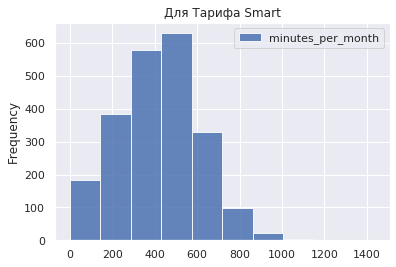

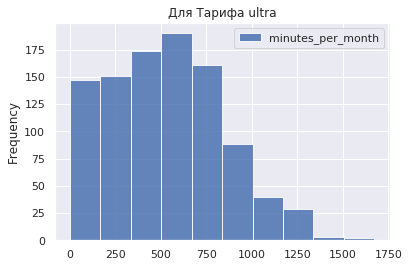

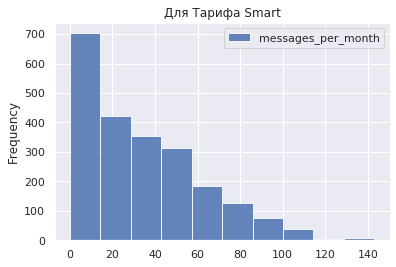

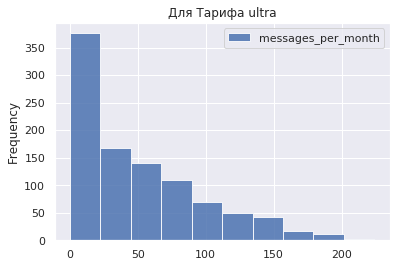

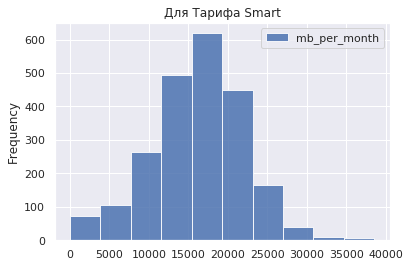

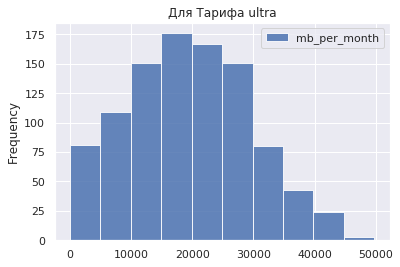

In [55]:
for name in values_list:
    histing(all_calls_messages_internet.query('tariff == "smart"'), name, 'Для Тарифа Smart')
    plt.show()
    histing(all_calls_messages_internet.query('tariff == "ultra"'), name, 'Для Тарифа ultra')
    plt.show()

Клиенты с тарифом "Смарт" им всего не хватает, чаще всего превыщают лимит интернет трафика, но и по минутам звонков и сообщениям не все впорядке.  
Клиенты с тарифом Ультра: Им явно хватает минут и сообщений, но есть так же проблема с интернет трафиком.

Для более полной картины нам не хватает диаграм размаха, так же напишем функцию для ее отрисовки:
укажем датафрейм (data) и параметр для среза(request)

In [56]:
def boxploting(data, request):
    
    tariff = ['smart', 'ultra']
    
    for name in values_list:
        
        for item in tariff:
            plt.figure(figsize=(15, 2))
            if name == 'minutes_per_month':
                title = ('Минуты')
            elif name == 'messages_per_month':
                title = ('Сообщения')
            else:
                title = ('Мегабайты')
            print('Тариф', item, ':', title)
            
            if request == 'query':
                sns.boxplot(
                    data=data.query('tariff == @item'), x=name, 
                    orient="h", width=0.3)
            else:
                sns.boxplot(data=data.loc[[item]][name], width=0.3, orient="h")
                
            plt.show()

Строим диаграмму размаха

Тариф smart : Минуты


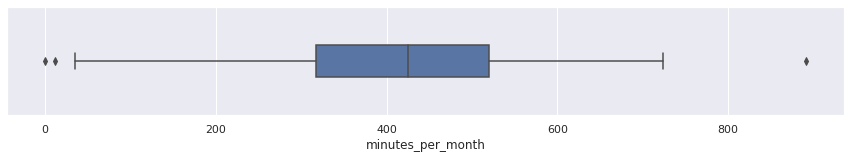

Тариф ultra : Минуты


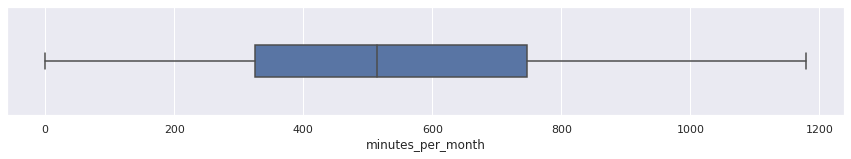

Тариф smart : Сообщения


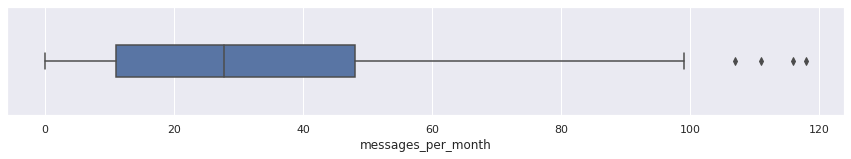

Тариф ultra : Сообщения


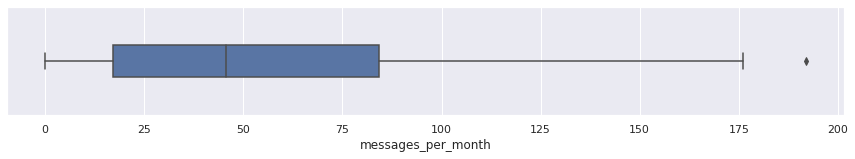

Тариф smart : Мегабайты


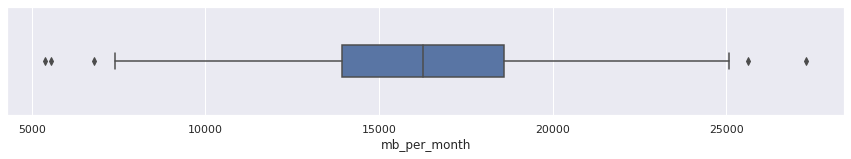

Тариф ultra : Мегабайты


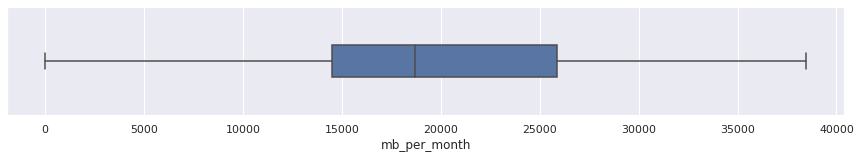

In [57]:
boxploting(statistics_per_user, 'query')

Датасеты симметричны, распределения нормальные

#### Дисперсия

Найдем дисперсию

In [58]:
variance_tariffs = (all_calls_messages_internet.pivot_table(index='tariff', values=['minutes_per_month', 'messages_per_month', 'mb_per_month'], 
                                  aggfunc='var')
        [['minutes_per_month', 'messages_per_month', 'mb_per_month']]
)

variance_tariffs.columns = ['minutes_var', 'messages_var', 'mb_var']

variance_tariffs

,minutes_var,messages_var,mb_var
tariff,,,
smart,"36,219.316",796.813,"34,488,584.029"
ultra,"100,873.633","2,285.266","101,767,019.920"


<div class="alert alert-info"> <b>Пользователи тарифа Ультра используют большее количество звонков, смс и интернета.</b></div>

#### Стандартное отклонение

Найдем стандартное отклонение

In [59]:
std_tariffs = (all_calls_messages_internet.pivot_table(index='tariff', values=['minutes_per_month', 'messages_per_month', 'mb_per_month'], 
                                  aggfunc='std')
        [['minutes_per_month', 'messages_per_month', 'mb_per_month']]
)

std_tariffs.columns = ['minutes_std', 'messages_std', 'mb_std']

std_tariffs

,minutes_std,messages_std,mb_std
tariff,,,
smart,190.314,28.228,"5,872.698"
ultra,317.606,47.804,"10,087.964"


<div class="alert alert-info"> <b>Так же подтвержается история что пользователи тарифа Ультра более активны</b></div>

#### Подсчет минут разговора, количества сообщений и объёма интернет-трафика, который требуется пользователям каждого тарифа

По традиции создаем функцию, которая нам посчитает требования потребления каждого клиента

In [60]:
def limits(data, tariff):
    print('Клиентам тарифа {} требуется:'.format(tariff))
    
    for name in values_list:
        if name == 'minutes_per_month':

            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_tariffs.loc[tariff, 'minutes_std'])
                .astype('int')
            )
            print('  -  минут: до {}'.format(higher_limit))
          
        elif name == 'messages_per_month':
            
            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_tariffs.loc[tariff, 'messages_std'])
                .astype('int')
            )
            print('  -  сообщений: до {}'.format(higher_limit))
          
        else:
            
            higher_limit = (
                (data[data['tariff'] == tariff][name].mean() + 3 * std_tariffs.loc[tariff, 'mb_std'])
                .astype('int')
            )
            print('  -  мегабайт: до {}'.format(higher_limit))
            
    print()

In [61]:
limits(all_calls_messages_internet, 'smart')
limits(all_calls_messages_internet, 'ultra')

Клиентам тарифа smart требуется:
  -  минут: до 988
  -  сообщений: до 118
  -  мегабайт: до 33833

Клиентам тарифа ultra требуется:
  -  минут: до 1479
  -  сообщений: до 192
  -  мегабайт: до 49734



<div class="alert alert-info"> <b>Та же история, Клиенты ультра поглощают услуги Мегалайна активнее</b></div>

## Рассмотрим средние данные за каждый из 12ти месяцев

Создаем сводный датасет с помесячной информацией о клиентах.

In [62]:
amount_per_month = (
    all_calls_messages_internet.pivot_table(index=['tariff', 'month'], values=['minutes_per_month', 'messages_per_month', 'mb_per_month'], aggfunc='sum')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]
)

In [63]:
amount_per_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                   6931                 620        289589
       2                  17324                1397        672943
       3                  30034                2453       1163549
       4                  41119                3443       1508445
       5                  54618                4762       2229523
       6                  64885                5478       2591500
       7                  82079                6784       3165854
       8                  99045                7905       3905289
       9                 111439                8746       4240910
       10                125284                9927       4928875
       11                137544               10768       5341545
       12                161275               12130       6107164
ultra  1                   3853                 304        118273
       2                   7131                 527        282643
       3                  18117                1195        648855
       4                  25191                1736        925600
       5                  34192                2536       1297436
       6                  40295                3505       1589794
       7                  49667                4536       1865235
       8                  54653                5183       2094781
       9                  62036                6013       2208647
       10                 68644                7187       2465723
       11                 72545                7476       2651610
       12                 82400                8425       3029476

Сомтрим на распределения у тарифов (минуты, сообщения, мегабайты):

Тариф smart : Минуты


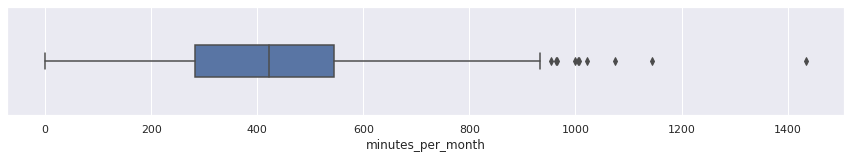

Тариф ultra : Минуты


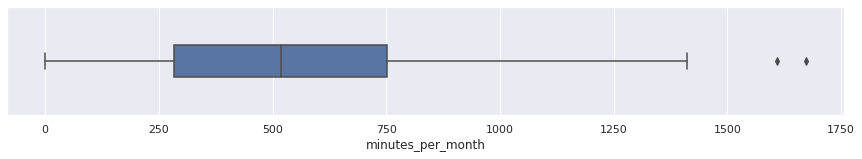

Тариф smart : Сообщения


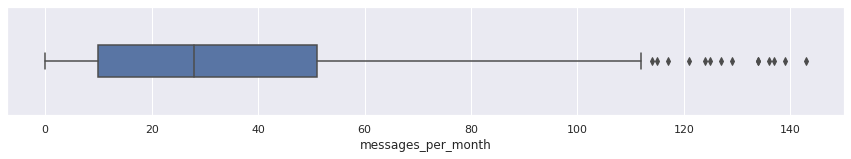

Тариф ultra : Сообщения


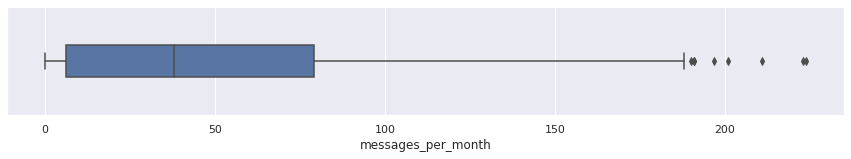

Тариф smart : Мегабайты


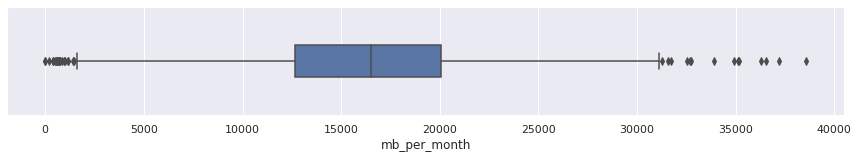

Тариф ultra : Мегабайты


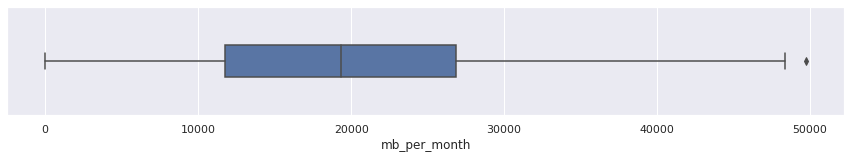

In [64]:
boxploting(all_calls_messages_internet, 'query')

Распределения симметричные, нормальные. Следовательно к ним применимо правило трех сигм.

### Среднее, дисперсия, стандартное отклонение

##### Среднее

Датасет со средним значением минут, сообщений и мегабайт для всех клиентов по месяцам и тарифам.

In [65]:
mean_month = (
    (all_calls_messages_internet.pivot_table(index=['tariff', 'month'], values=['minutes_per_month', 'messages_per_month', 'mb_per_month'], aggfunc='mean')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']])
     .round(2)
)

In [66]:
mean_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                203.850              18.240     8,517.320
       2                298.690              24.090    11,602.470
       3                390.050              31.860    15,111.030
       4                367.130              30.740    13,468.260
       5                387.360              33.770    15,812.220
       6                395.640              33.400    15,801.830
       7                408.350              33.750    15,750.520
       8                421.470              33.640    16,618.250
       9                428.610              33.640    16,311.190
       10               426.140              33.770    16,764.880
       11               435.270              34.080    16,903.620
       12               478.560              35.990    18,122.150
ultra  1                428.110              33.780    13,141.440
       2                297.120              21.960    11,776.790
       3                489.650              32.300    17,536.620
       4                458.020              31.560    16,829.090
       5                510.330              37.850    19,364.720
       6                479.700              41.730    18,926.120
       7                545.790              49.850    20,497.090
       8                510.780              48.440    19,577.390
       9                539.440              52.290    19,205.630
       10               558.080              58.430    20,046.530
       11               541.380              55.790    19,788.130
       12               592.810              60.610    21,794.790

Построим гистограммы среднего для двух тарифов:

Тариф smart : Минуты


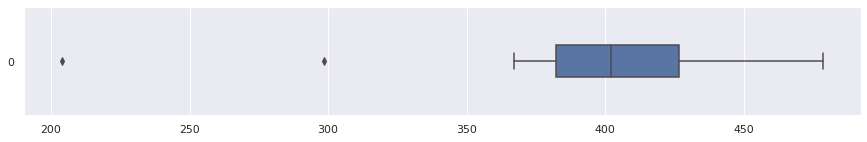

Тариф ultra : Минуты


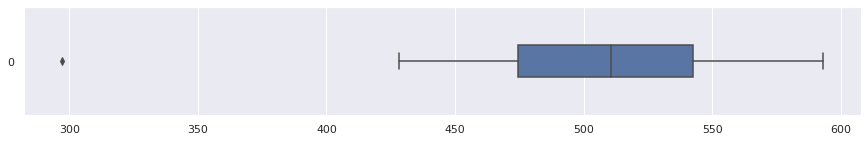

Тариф smart : Сообщения


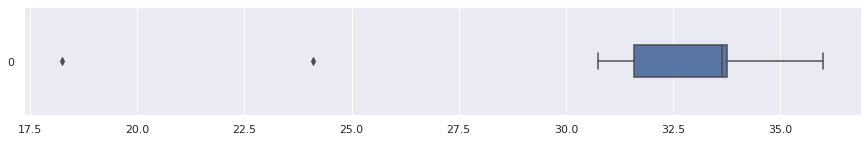

Тариф ultra : Сообщения


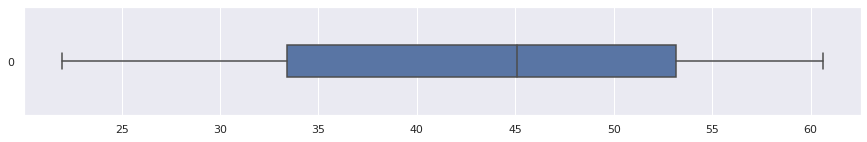

Тариф smart : Мегабайты


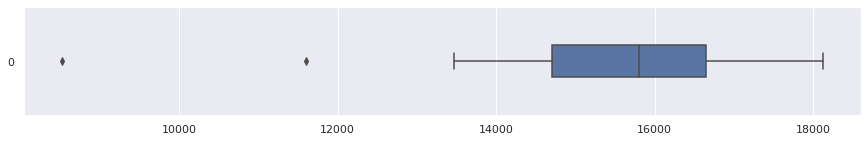

Тариф ultra : Мегабайты


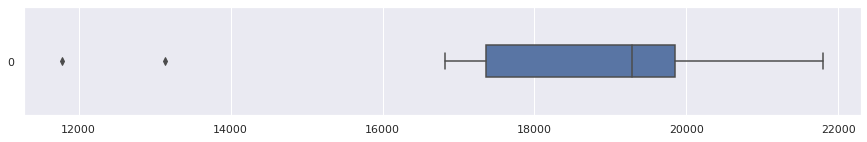

In [67]:
boxploting(mean_month, 'else')

##### Дисперсия

Дисперсия для каждого тарифа по месяцам:

In [68]:
variance_month = (
    all_calls_messages_internet.pivot_table(index=['tariff','month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='var')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]
     .round(2)
)

In [69]:
variance_month

minutes_per_month  messages_per_month    mb_per_month
tariff month                                                       
smart  1             23,787.340             262.370  41,568,653.620
       2             36,412.290             473.100  39,061,419.130
       3             36,823.160             718.490  33,988,577.840
       4             34,778.210             602.140  32,493,126.880
       5             34,820.060             730.990  35,769,127.190
       6             30,742.920             806.810  33,560,592.570
       7             32,250.270             799.890  34,803,022.090
       8             34,793.580             838.260  31,307,903.150
       9             33,535.340             790.620  27,016,579.280
       10            35,392.340             816.110  34,358,144.320
       11            31,605.240             805.940  28,540,745.860
       12            39,698.620             934.950  31,090,350.820
ultra  1             72,769.360             940.690  47,132,578.030
       2             87,919.680             716.820 113,329,233.480
       3            111,384.900           1,732.380 119,968,180.850
       4             71,653.870           1,407.290  94,469,431.530
       5             83,870.190           1,624.640 100,941,151.420
       6             91,535.950           1,986.300  86,373,397.620
       7             94,322.280           2,372.040 101,319,183.790
       8             97,956.500           2,171.740 109,776,853.410
       9            105,716.780           2,152.860  90,000,241.820
       10           106,464.580           2,697.180  96,113,045.010
       11            96,570.060           2,476.950  98,173,496.090
       12           117,276.330           2,681.980 107,728,127.570

Построим гистограммы:

Тариф smart : Минуты


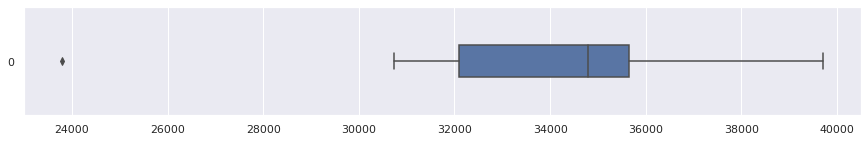

Тариф ultra : Минуты


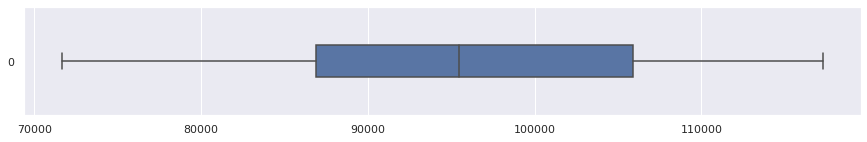

Тариф smart : Сообщения


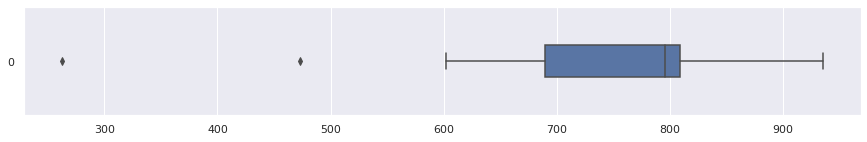

Тариф ultra : Сообщения


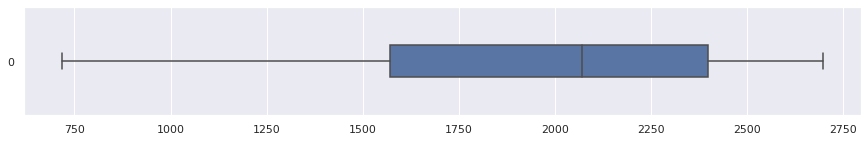

Тариф smart : Мегабайты


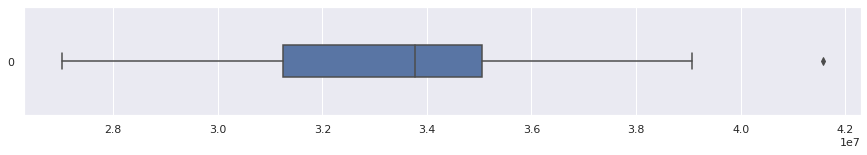

Тариф ultra : Мегабайты


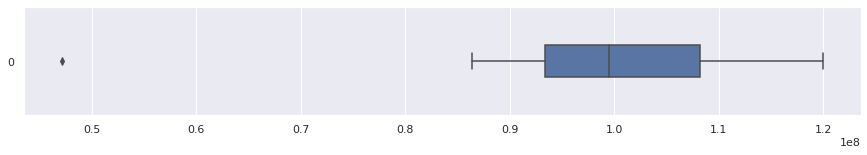

In [70]:
boxploting(variance_month, 'no')

##### Стандартное отклонение

Найдем стандартное отклонение для каждого тарифа по месяцам

In [71]:
std_month = (
    all_calls_messages_internet.pivot_table(index=['tariff','month'],
                                  values=['minutes_per_month',
                                          'messages_per_month',
                                          'mb_per_month'], 
                                  aggfunc='std')
    [['minutes_per_month',
      'messages_per_month',
      'mb_per_month']]
     .round(2)
)

In [72]:
std_month

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                154.230              16.200     6,447.380
       2                190.820              21.750     6,249.910
       3                191.890              26.800     5,829.970
       4                186.490              24.540     5,700.270
       5                186.600              27.040     5,980.730
       6                175.340              28.400     5,793.150
       7                179.580              28.280     5,899.410
       8                186.530              28.950     5,595.350
       9                183.130              28.120     5,197.750
       10               188.130              28.570     5,861.580
       11               177.780              28.390     5,342.350
       12               199.250              30.580     5,575.870
ultra  1                269.760              30.670     6,865.320
       2                296.510              26.770    10,645.620
       3                333.740              41.620    10,953.000
       4                267.680              37.510     9,719.540
       5                289.600              40.310    10,046.950
       6                302.550              44.570     9,293.730
       7                307.120              48.700    10,065.740
       8                312.980              46.600    10,477.440
       9                325.140              46.400     9,486.850
       10               326.290              51.930     9,803.730
       11               310.760              49.770     9,908.250
       12               342.460              51.790    10,379.220

Тариф smart : Минуты


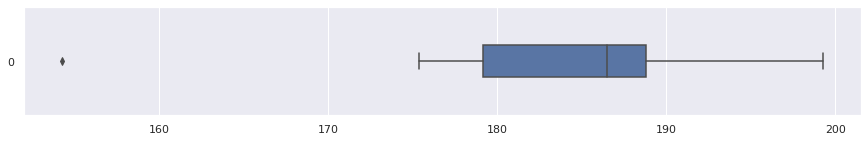

Тариф ultra : Минуты


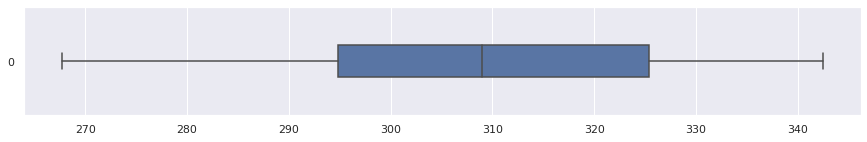

Тариф smart : Сообщения


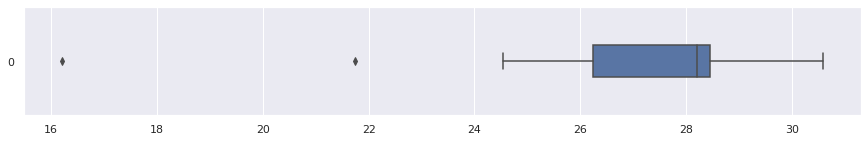

Тариф ultra : Сообщения


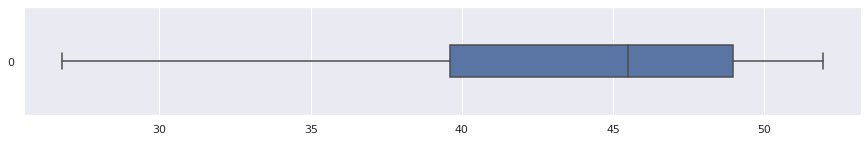

Тариф smart : Мегабайты


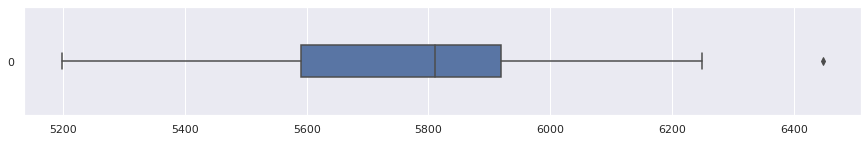

Тариф ultra : Мегабайты


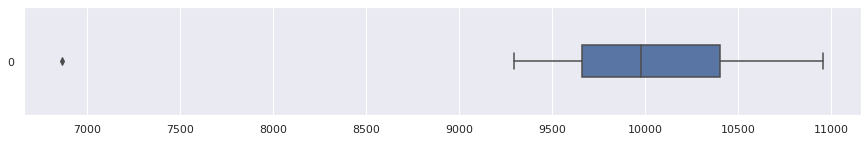

In [73]:
boxploting(std_month, 'no')

#### Подсчет минут разговора, количества сообщений и объёма интернет-трафика требуется пользователям каждого тарифа по месяцам

Узнаем что и сколько нужно клиентам:

In [74]:
requirement = mean_month + (3 * std_month) 

In [75]:
requirement

minutes_per_month  messages_per_month  mb_per_month
tariff month                                                     
smart  1                666.540              66.840    27,859.460
       2                871.150              89.340    30,352.200
       3                965.720             112.260    32,600.940
       4                926.600             104.360    30,569.070
       5                947.160             114.890    33,754.410
       6                921.660             118.600    33,181.280
       7                947.090             118.590    33,448.750
       8                981.060             120.490    33,404.300
       9                978.000             118.000    31,904.440
       10               990.530             119.480    34,349.620
       11               968.610             119.250    32,930.670
       12             1,076.310             127.730    34,849.760
ultra  1              1,237.390             125.790    33,737.400
       2              1,186.650             102.270    43,713.650
       3              1,490.870             157.160    50,395.620
       4              1,261.060             144.090    45,987.710
       5              1,379.130             158.780    49,505.570
       6              1,387.350             175.440    46,807.310
       7              1,467.150             195.950    50,694.310
       8              1,449.720             188.240    51,009.710
       9              1,514.860             191.490    47,666.180
       10             1,536.950             214.220    49,457.720
       11             1,473.660             205.100    49,512.880
       12             1,620.190             215.980    52,932.450

In [76]:
def ploting(data):       
    for name in values_list:
        if name == 'minutes_per_month':
                title = ('Минуты')
        elif name == 'messages_per_month':
                title = ('Сообщения')
        else:
                title = ('Мегабайты')
        
        data.loc[['smart']][name].plot(kind='line', title=title, legend=True)
        data.loc[['ultra']][name].plot(kind='line', legend=True)
        plt.show()

Распределение количества услуг по месяцам для пользователей обоих тарифов.

- smart - синий
- ultra - оранжевый

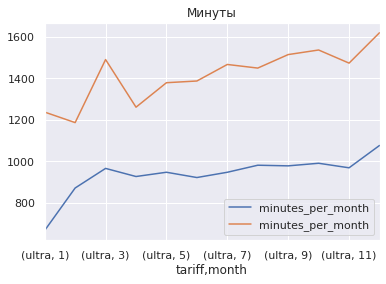

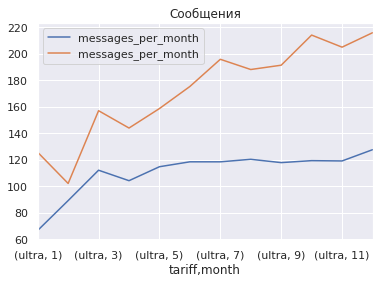

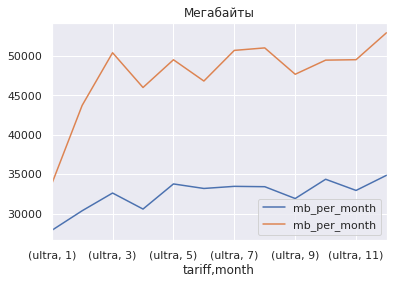

In [77]:
ploting(requirement)

Можно увидеть на графиках рост летом, к концу года. Наверное это связано с сезоном отпусков (фоточки шлют и выкладыват) и Новогодней суетой

In [78]:
tarif = ['smart', 'ultra']
for name in tarif:
    print('Среднее количество минут в месяц, удовлетворяющее большинство клиентов тарифа {}:'.format(name),
          requirement.loc[[name]]['minutes_per_month'].mean())
    print('Среднее количество сообщений в месяц, удовлетворяющее большинство клиентов тарифа {}:'.format(name),
          requirement.loc[[name]]['messages_per_month'].mean())
    print('Среднее количество мегабайт в месяц, удовлетворяющее большинство клиентов тарифа {}:'.format(name),
          requirement.loc[[name]]['mb_per_month'].mean())
    print()

Среднее количество минут в месяц, удовлетворяющее большинство клиентов тарифа smart: 936.7025
Среднее количество сообщений в месяц, удовлетворяющее большинство клиентов тарифа smart: 110.81916666666666
Среднее количество мегабайт в месяц, удовлетворяющее большинство клиентов тарифа smart: 32433.741666666665

Среднее количество минут в месяц, удовлетворяющее большинство клиентов тарифа ultra: 1417.0816666666667
Среднее количество сообщений в месяц, удовлетворяющее большинство клиентов тарифа ultra: 172.87583333333336
Среднее количество мегабайт в месяц, удовлетворяющее большинство клиентов тарифа ultra: 47618.37583333333



#### Выводы

Данные количества минут, сообщений и мегабайт для обоих тарифов симметричны относительно среднего, распределение нормальное. Были найдены предельные значения этих показателей, которые удовлетворят большинство клиентов.

Гистограммы по каждому параметры для двух тарифов:

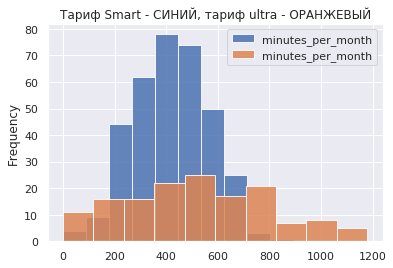

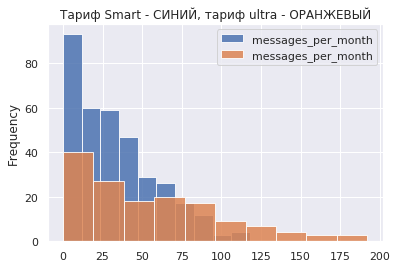

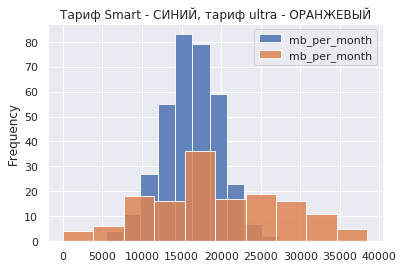

In [79]:
for name in values_list:
    histing(statistics_per_user.query('tariff == "smart"'), name, 'Тариф Smart')
    histing(statistics_per_user.query('tariff == "ultra"'), name, 'Тариф Smart - СИНИЙ, тариф ultra - ОРАНЖЕВЫЙ')
    plt.show()

Абоненты тарифа __ultra__ не выходят за лимиты по показателям минут и сообщений, однако забирают интернет сверх лимита.


Пользователям __smart__ интернета явно не хватает. Очень часто они используют интернет сверх лимита. Также превышают лимит по показателям звонков и СМС.

Высчитали среднее количество "услуг" (минуты, сообщения, интернет), чтобы клиент каждого тарифа чувствовал себя счастилым:  

Пользователям тарифа smart требуется:
  -  минут: до 851
  -  сообщений: до 111
  -  мегабайт: до 26968
  
  Пользователям тарифа smart следует предложить тариф с увеличенным лимитом по услугам.

Пользователям тарифа ultra требуется:
  -  минут: до 1351
  -  сообщений: до 191
  -  мегабайт: до 44559

## 4. Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Формулируем __нулевую гипотезу Н0__ исходя из того, что средняя выручка от клиентов двух тарифов равна.

Тогда __альтернативная гипотеза Н1__ - средняя выручка клиентов не равна.

Сформируем срезы по тарифам

In [80]:
smart_revenue = all_calls_messages_internet[all_calls_messages_internet['tariff'] == 'smart']['total_income']
ultra_revenue = all_calls_messages_internet[all_calls_messages_internet['tariff'] == 'ultra']['total_income']

<div class="alert alert-info"> <b>Сделал</b></div>

Средняя выручка по тарифам:

In [81]:
print('Средняя выручка для smart:', np.mean(smart_revenue))
print('Средняя выручка для ultra:', np.mean(ultra_revenue))

Средняя выручка для smart: 1231.1749663526246
Средняя выручка для ultra: 2059.8578680203045


Проверим нулевую гипотезу с помощью т-теста:

Выборки из разных тарифов, поэтому используем метод ttest

In [82]:
alpha = .05 

results = scipy.stats.ttest_ind(smart_revenue,
                         ultra_revenue,
                         equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от клиентов двух тарифов различается')
else:
    print('Отвергнуть гипотезу не получилось: значения не имеют значимых различий')

p-значение:  6.980546461552268e-298
Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от клиентов двух тарифов различается


Разница между средней прибылью от пользователей двух тарифов различается, Ультра тариф явно впереди

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формируем срезы по городам:

In [83]:
moscow_revenue = all_calls_messages_internet[all_calls_messages_internet['city'] == 'Москва']['total_income']
other_revenue = all_calls_messages_internet[all_calls_messages_internet['city'] != 'Москва']['total_income']

In [84]:
print('Средняя выручка для Москвы:', np.mean(moscow_revenue))
print('Средняя выручка для всех остальных городов:', np.mean(other_revenue))

Средняя выручка для Москвы: 1505.7037643207857
Средняя выручка для всех остальных городов: 1480.3165578179023


Формулируем нулевую гипотезу Н0 исходя из того, что средняя выручка от абонентов Москвы и остальных городов равна.

Иначе гипотеза Н1 - средняя выручка различается.

В данном случае выборки также являются выборками из двух генеральных совокупностей - Москва / другие города, - поэтому используем метод __scipy.stats.ttest_ind()__.

In [85]:
alpha = .05 

results = scipy.stats.ttest_ind(moscow_revenue,
                                other_revenue,
                                equal_var=False)

print('p-значение: ', results.pvalue) 

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: разница между средней прибылью от клиентов Москвы и других городов различается')
else:
    print('Отвергнуть гипотезу не получилось: значения не имеют значимых различий')

p-значение:  0.45140054959267073
Отвергнуть гипотезу не получилось: значения не имеют значимых различий


### Выводы

Нам надо было проверить 2 утверждения:
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.  
Сформулировали 2 гипотезы: нулевая - что средняя выручка клиентов равна и альтернативная - средняя выручка различается.
Мы посчитали среднюю выручку 2х тарифов, провели ttest и получили такой результат: Выручка двух тарифов различается.  
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
Сформулировали 2 гипотезы: нулевая - что средняя выручка клиентов Москвы и средняя выручка клиентов остальных городов равны и и альтернативная - средняя выручка различается.  
Провели ttest, он не опревергнул нулевую гипотезу - выручки похожи.

# Общие выводы

Тарифы значительно различаются, как по поведению клиентов, так и по выручке для "Мегалайн". Узнали значения тарифов (минуты, сообщения и мегабайты) которые удовлетворили бы большинство клиентов.  
Клиенты тарифа "смарт" используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи "ультра". Лимита на звонки и минуты в "ультра" в среднем не достигает никто. При этом интернетом пользователи "ультра" пользуются гораздо активнее. Скорее всего, пользователи "ультра" выбирают этот тариф из-за большего интернет-трафика.   
Тариф "ультра" приносит компании бОльшую выручку. Скорее всего нужно уделить больше внимания на его продвижении - в Москве и других регионах.